In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Conv2D, MaxPool2D, BatchNormalization , Activation, ReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models, losses
import cv2
import numpy as np 

# 전이학습
from keras.applications.resnet_v2 import ResNet50V2

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.0 
x_test = x_test.astype('float32') / 255.0 

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
model = ResNet50V2(include_top=True, weights=None, input_shape=(32, 32, 3), classes=10)

In [ ]:
model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 18, 18, 64)   0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [ ]:
model.compile(optimizer='adam', 
              loss=losses.categorical_crossentropy, 
              metrics=['accuracy'])

history = model.fit(x_train, y_train, 
                    batch_size=128, 
                    epochs=50, 
                    verbose=1, 
                    validation_data=(x_test, y_test))

Epoch 1/50
391/391 [==============================] - 99s 160ms/step - loss: 1.6400 - accuracy: 0.4210 - val_loss: 1.8974 - val_accuracy: 0.3447
Epoch 2/50
391/391 [==============================] - 59s 150ms/step - loss: 1.3305 - accuracy: 0.5297 - val_loss: 33.3565 - val_accuracy: 0.1543
Epoch 3/50
391/391 [==============================] - 61s 156ms/step - loss: 1.2623 - accuracy: 0.5628 - val_loss: 2.2973 - val_accuracy: 0.3387
Epoch 4/50
391/391 [==============================] - 58s 149ms/step - loss: 1.1672 - accuracy: 0.5961 - val_loss: 1.9910 - val_accuracy: 0.3570
Epoch 5/50
391/391 [==============================] - 58s 149ms/step - loss: 0.9372 - accuracy: 0.6720 - val_loss: 1.0904 - val_accuracy: 0.6204
Epoch 6/50
391/391 [==============================] - 59s 150ms/step - loss: 0.8742 - accuracy: 0.7000 - val_loss: 3.0693 - val_accuracy: 0.5463
Epoch 7/50
391/391 [==============================] - 58s 150ms/step - loss: 0.8584 - accuracy: 0.7065 - val_loss: 1.1712 - val_a

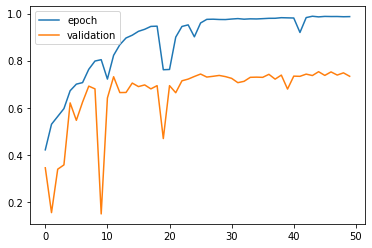

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['epoch', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
predictions = model.predict(x_test, verbose=1)

313/313 [==============================] - 8s 24ms/step - loss: 1.4490 - accuracy: 0.7334
Test loss: 1.448967695236206
Test accuracy: 0.7333999872207642
313/313 [==============================] - 7s 18ms/step
